In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"E:\CSV Files\car_price_data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [7]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [8]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

# Encoding the categorical column:

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le= LabelEncoder()

In [11]:
df.Fuel_Type=le.fit_transform(df.Fuel_Type)
df.Seller_Type=le.fit_transform(df.Seller_Type)
df.Transmission=le.fit_transform(df.Transmission)


In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [13]:
x=df.drop(columns=["Selling_Price","Car_Name"],axis=1)

In [14]:
y=df["Selling_Price"]

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.shape

(301, 9)

In [18]:
x.shape

(301, 7)

In [19]:
y.shape

(301,)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=22)

In [21]:
x_train.shape, x_test.shape

((210, 7), (91, 7))

In [22]:
y_train.shape, y_test.shape

((210,), (91,))

# model training:

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [24]:
linear=LinearRegression()

In [25]:
linear.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict=linear.predict(x_test)

In [27]:
accuracy=metrics.r2_score(y_test,y_predict)

In [28]:
accuracy

0.6794853483923248

# visualize actual price and predicted price:

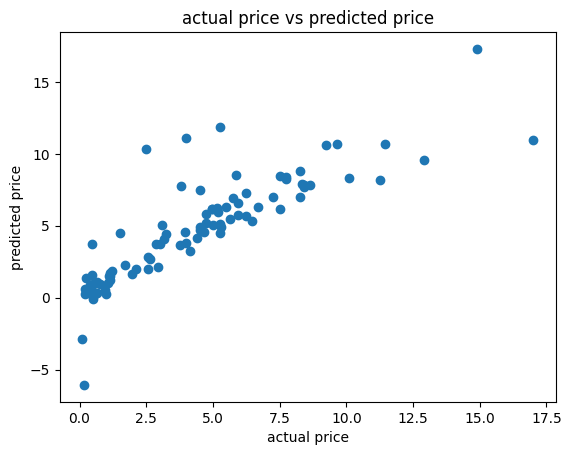

In [29]:
plt.scatter(y_test,y_predict)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [30]:
df.to_csv("car.csv")